### Project exploration

In [1]:
from scipy.sparse import coo_matrix

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
movies = pd.read_csv('data/movies.csv')
# Contains movieId, title, genres   

ratings = pd.read_csv('data/ratings.csv')
# Contains userId, movieId, rating, timestamp

tags = pd.read_csv('data/tags.csv')
# Contains userId, movieId, tag, timestamp

links = pd.read_csv('data/links.csv')
# Contains movieId, imdbId, tmdbId

In [11]:
#imdb descriptions:
imdb = pd.read_csv('data/imdb/movies.csv')

#drop if description is "Add a plot"
imdb = imdb[imdb['description'] != "Add a Plot"]

#remove 'tt' from start of id column
imdb['id'] = imdb['id'].str[2:]
imdb['id'] = pd.to_numeric(imdb['id'], errors='coerce')

#only keep id and description
imdb = imdb[['id', 'description']]

C:\Users\juliu\AppData\Local\Temp\ipykernel_13940\3983035900.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb = pd.read_csv('data/imdb/movies.csv')


In [12]:
#merge imdb descriptions with links
links = links.merge(imdb, left_on='imdbId', right_on='id', how='left')

In [13]:
links = links.dropna(subset=['id'])

In [14]:
links

,movieId,imdbId,tmdbId,id,description
0,1,114709,862.0,114709.0,A cowboy doll is profoundly threatened and jea...
1,2,113497,8844.0,113497.0,When two kids find and play a magical board ga...
5,6,113277,949.0,113277.0,A group of high-end professional thieves start...
7,8,112302,45325.0,112302.0,Two best friends witness a murder and embark o...
8,9,114576,9091.0,114576.0,A former fireman takes on a group of terrorist...
...,...,...,...,...,...
87559,292541,10370812,989589.0,10370812.0,"A mixed-race Chilean, rides south on an expedi..."
87561,292585,985060,147230.0,985060.0,Blood is thicker than water in this tiny Texas...
87568,292605,10676126,855800.0,10676126.0,Baghdad. The last week of 2006. All over the c...
87572,292613,15744298,897087.0,15744298.0,An ex special forces operator takes a job to p...


In [15]:
#encode genres using pd.get_dummies
genres = movies['genres'].str.get_dummies()
movies = pd.concat([movies, genres], axis=1)
movies.drop('genres', axis=1, inplace=True)


In [16]:
movies

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87580,292731,The Monroy Affaire (2022),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87581,292737,Shelter in Solitude (2023),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
87582,292753,Orca (2023),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87583,292755,The Angry Breed (1968),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
links

,movieId,imdbId,tmdbId,id,description
0,1,114709,862.0,114709.0,A cowboy doll is profoundly threatened and jea...
1,2,113497,8844.0,113497.0,When two kids find and play a magical board ga...
5,6,113277,949.0,113277.0,A group of high-end professional thieves start...
7,8,112302,45325.0,112302.0,Two best friends witness a murder and embark o...
8,9,114576,9091.0,114576.0,A former fireman takes on a group of terrorist...
...,...,...,...,...,...
87559,292541,10370812,989589.0,10370812.0,"A mixed-race Chilean, rides south on an expedi..."
87561,292585,985060,147230.0,985060.0,Blood is thicker than water in this tiny Texas...
87568,292605,10676126,855800.0,10676126.0,Baghdad. The last week of 2006. All over the c...
87572,292613,15744298,897087.0,15744298.0,An ex special forces operator takes a job to p...


In [19]:
ratings

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [18]:
#merge movies and ratings
movie_ratings = pd.merge(movies, ratings, on='movieId')

#average rating for each movie
average_ratings = movie_ratings.groupby('title')['rating'].mean()
average_ratings = average_ratings.sort_values(ascending=False)


In [17]:
# average genre rating per user
genre_ratings = movie_ratings.drop(columns=['movieId', 'title', 'rating', 'timestamp'])
genre_ratings = genre_ratings.groupby('userId').mean()

In [49]:
genre_ratings

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.134752,0.120567,0.000000,0.014184,0.361702,0.113475,0.007092,0.723404,0.056738,0.007092,0.021277,0.000000,0.000000,0.070922,0.255319,0.120567,0.113475,0.156028,0.014184
2,0.000000,0.173077,0.134615,0.153846,0.211538,0.500000,0.115385,0.000000,0.461538,0.076923,0.000000,0.019231,0.038462,0.134615,0.019231,0.403846,0.000000,0.211538,0.038462,0.000000
3,0.000000,0.394558,0.394558,0.081633,0.136054,0.367347,0.108844,0.000000,0.360544,0.115646,0.000000,0.027211,0.027211,0.068027,0.020408,0.238095,0.238095,0.217687,0.081633,0.020408
4,0.000000,0.407407,0.185185,0.000000,0.000000,0.259259,0.111111,0.000000,0.296296,0.111111,0.000000,0.259259,0.000000,0.000000,0.148148,0.000000,0.185185,0.444444,0.074074,0.000000
5,0.000000,0.424242,0.393939,0.090909,0.121212,0.272727,0.272727,0.000000,0.393939,0.060606,0.000000,0.060606,0.090909,0.090909,0.030303,0.121212,0.151515,0.484848,0.090909,0.030303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200944,0.003356,0.684564,0.362416,0.063758,0.033557,0.224832,0.218121,0.000000,0.295302,0.124161,0.006711,0.070470,0.191275,0.003356,0.087248,0.077181,0.369128,0.422819,0.067114,0.010067
200945,0.000000,0.175926,0.120370,0.037037,0.046296,0.296296,0.250000,0.000000,0.666667,0.064815,0.018519,0.046296,0.064815,0.009259,0.129630,0.222222,0.166667,0.305556,0.046296,0.009259
200946,0.000000,0.347826,0.304348,0.130435,0.173913,0.217391,0.260870,0.000000,0.434783,0.086957,0.000000,0.043478,0.130435,0.173913,0.000000,0.260870,0.130435,0.434783,0.043478,0.000000


In [54]:
# kmeans clustering based on genre ratings
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(genre_ratings)
genre_ratings['cluster'] = kmeans.predict(genre_ratings)


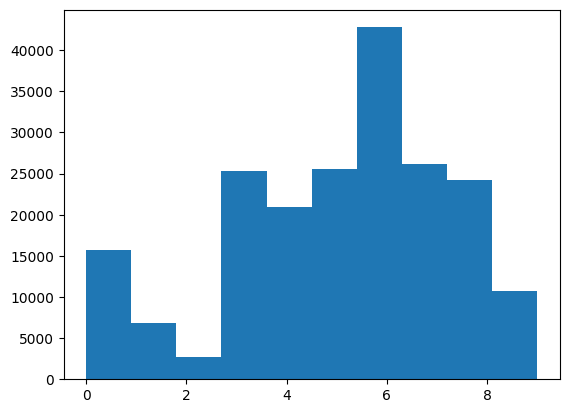

In [55]:
#plot cluster distribution
plt.hist(genre_ratings['cluster'])
plt.show()

In [22]:
#histogram over number of ratings
number_ratings = ratings.groupby('movieId')['rating'].count()

number_ratings.sort_values(ascending=False)

#how many movies more than 2 ratings:
print(number_ratings[number_ratings > 3].count())

48596


In [8]:
ratings.drop('timestamp', axis=1, inplace=True)

In [30]:
user_ids = ratings['userId'].astype('category').cat.codes
movie_ids = ratings['movieId'].astype('category').cat.codes

sparse_matrix = coo_matrix((ratings['rating'], (movie_ids, user_ids)))

In [34]:
csr_matrix = sparse_matrix.tocsr()

In [39]:
from sklearn.cluster import MiniBatchKMeans

n_clusters = 20
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=10000)

kmeans.fit(csr_matrix)

MiniBatchKMeans(batch_size=10000, n_clusters=20, random_state=42)

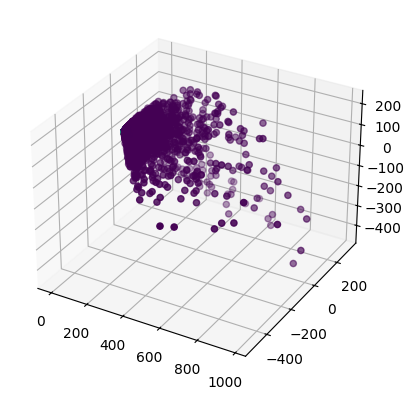

In [41]:
#plot clusters in 3D

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(csr_matrix)
reduced = pca.transform(csr_matrix)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced[:, 0], reduced[:, 1], reduced[:, 2], c=kmeans.labels_, cmap='viridis')
plt.show()
